<a href="https://colab.research.google.com/github/argosmaia/ArritmiaDataScience/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Argos Maia - Paulo José**

# **Questão 1 - a) Descreva a base de dados**

In [79]:
from scipy.io import arff
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt

In [22]:
caminho = "/content/arritmias_treino.arff"

dados = arff.loadarff(caminho)
base = pd.DataFrame(dados[0])
base

,Age,Sex,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,...,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10,class
0,55.0,b'0',175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,b'1'
1,40.0,b'1',160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,b'1'
2,49.0,b'1',162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,b'1'
3,44.0,b'0',168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,b'1'
4,45.0,b'1',165.0,86.0,77.0,143.0,373.0,150.0,65.0,12.0,...,0.0,4.4,-2.2,0.0,0.0,0.5,1.5,4.9,17.2,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,65.0,b'0',172.0,66.0,98.0,199.0,339.0,149.0,181.0,-4.0,...,0.0,15.0,-4.5,0.0,0.0,0.2,-0.4,26.4,23.0,b'10'
398,50.0,b'1',163.0,65.0,75.0,151.0,362.0,137.0,93.0,43.0,...,-0.4,5.1,-1.3,0.0,0.0,0.7,1.0,6.2,11.6,b'1'
399,27.0,b'1',160.0,42.0,78.0,153.0,374.0,165.0,85.0,23.0,...,-0.7,12.2,-2.4,0.0,0.0,0.5,1.9,11.0,25.0,b'1'
400,58.0,b'1',160.0,90.0,82.0,0.0,284.0,196.0,0.0,56.0,...,0.0,14.5,-2.3,0.0,0.0,0.2,-1.7,30.2,16.0,b'15'


In [ ]:
base.describe()

,Age,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,T,...,Amp_V6_1,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,394.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.0,402.000000,402.000000,402.000000,402.000000
mean,46.883085,166.343284,68.475124,88.721393,155.579602,366.564677,169.054726,90.238806,34.927861,34.565990,...,-0.321393,-0.288308,8.956468,-1.341791,0.004478,0.0,0.506716,1.148259,19.600498,28.925622
std,16.213776,39.136777,16.603206,15.312603,46.368091,34.153636,34.178306,26.689359,43.574253,59.526263,...,0.621349,0.551296,3.428765,1.517691,0.053130,0.0,0.352164,1.416437,13.411903,17.447615
min,0.000000,105.000000,6.000000,61.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,...,-5.600000,-4.100000,0.000000,-15.000000,0.000000,0.0,-0.800000,-6.000000,-36.600000,-38.600000
25%,36.000000,160.000000,60.000000,80.000000,141.000000,349.000000,147.250000,79.000000,8.000000,14.000000,...,-0.600000,-0.500000,6.525000,-2.100000,0.000000,0.0,0.400000,0.500000,11.350000,17.325000
50%,47.000000,164.000000,68.000000,86.000000,157.500000,367.000000,161.000000,91.000000,40.000000,41.000000,...,-0.200000,0.000000,8.700000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.450000
75%,59.000000,170.000000,79.000000,94.000000,175.750000,383.000000,178.000000,102.750000,66.000000,63.000000,...,0.000000,0.000000,11.100000,0.000000,0.000000,0.0,0.700000,2.100000,26.175000,40.475000
max,83.000000,780.000000,176.000000,188.000000,524.000000,509.000000,327.000000,205.000000,169.000000,179.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,97.600000


# **a) Descrição dos dados** 

<p><p></p></p>

**Age**: *Numérico*(razão, continuo) = Mostra a idade dos 402 pacientes presentes na lista

**Sex**: *Categórico* (binário) - Gênero do paciente (0: Masculino, 1: Feminino) = Mostra o sexo do paciente

**Height**: *Numérico* (razão, continuo) = Mostra a altura dos pacientes

**Weight**: *Numérico* (razão, continuo) = Mostra o peso dos pacientes

**QRS_duration**: *Numérico* (razão, continuo) = Duração do complexo QRS

**P-R**: *Numérico* (razão, continuo) = intervalo P-R

**Q-T**: *Numérico* (razão, continuo) = Intervalo Q-T

**T_interval**: *Numérico* (razão, continuo) = intervalo T

**P_interval**: *Numérico* (razão, continuo) = intervalo P

**QRS**: *Numérico* (razão, continuo) = valor do complexo de QRS

**Categoria numérica (razão, continuo) de J até Amp_V6_10**: Representando valores de amplitude de canais diferentes de ESG 

**Class**: Categórico (nominal, dicreta) = Classe de dados de arritmia cardíaca de 1 até 15



In [23]:
base.describe()

,Age,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,T,...,Amp_V6_1,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,394.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.0,402.000000,402.000000,402.000000,402.000000
mean,46.883085,166.343284,68.475124,88.721393,155.579602,366.564677,169.054726,90.238806,34.927861,34.565990,...,-0.321393,-0.288308,8.956468,-1.341791,0.004478,0.0,0.506716,1.148259,19.600498,28.925622
std,16.213776,39.136777,16.603206,15.312603,46.368091,34.153636,34.178306,26.689359,43.574253,59.526263,...,0.621349,0.551296,3.428765,1.517691,0.053130,0.0,0.352164,1.416437,13.411903,17.447615
min,0.000000,105.000000,6.000000,61.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,...,-5.600000,-4.100000,0.000000,-15.000000,0.000000,0.0,-0.800000,-6.000000,-36.600000,-38.600000
25%,36.000000,160.000000,60.000000,80.000000,141.000000,349.000000,147.250000,79.000000,8.000000,14.000000,...,-0.600000,-0.500000,6.525000,-2.100000,0.000000,0.0,0.400000,0.500000,11.350000,17.325000
50%,47.000000,164.000000,68.000000,86.000000,157.500000,367.000000,161.000000,91.000000,40.000000,41.000000,...,-0.200000,0.000000,8.700000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.450000
75%,59.000000,170.000000,79.000000,94.000000,175.750000,383.000000,178.000000,102.750000,66.000000,63.000000,...,0.000000,0.000000,11.100000,0.000000,0.000000,0.0,0.700000,2.100000,26.175000,40.475000
max,83.000000,780.000000,176.000000,188.000000,524.000000,509.000000,327.000000,205.000000,169.000000,179.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,97.600000


# **b) Descrição de atributos numéricos e categóricos, escala nominal e razão, e a cardinalidade (discreta, conínua ou binária)**

Ao se descrever os dados de cada atributo presente segubdo sua ***frequência, max, min e dp***, analisa-se cada coluna presente.

In [78]:
from scipy.io import arff
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt

In [3]:
caminho = "/content/arritmias_treino.arff"

dados = arff.loadarff(caminho)
base = pd.DataFrame(dados[0])
base

,Age,Sex,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,...,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10,class
0,55.0,b'0',175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,b'1'
1,40.0,b'1',160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,b'1'
2,49.0,b'1',162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,b'1'
3,44.0,b'0',168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,b'1'
4,45.0,b'1',165.0,86.0,77.0,143.0,373.0,150.0,65.0,12.0,...,0.0,4.4,-2.2,0.0,0.0,0.5,1.5,4.9,17.2,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,65.0,b'0',172.0,66.0,98.0,199.0,339.0,149.0,181.0,-4.0,...,0.0,15.0,-4.5,0.0,0.0,0.2,-0.4,26.4,23.0,b'10'
398,50.0,b'1',163.0,65.0,75.0,151.0,362.0,137.0,93.0,43.0,...,-0.4,5.1,-1.3,0.0,0.0,0.7,1.0,6.2,11.6,b'1'
399,27.0,b'1',160.0,42.0,78.0,153.0,374.0,165.0,85.0,23.0,...,-0.7,12.2,-2.4,0.0,0.0,0.5,1.9,11.0,25.0,b'1'
400,58.0,b'1',160.0,90.0,82.0,0.0,284.0,196.0,0.0,56.0,...,0.0,14.5,-2.3,0.0,0.0,0.2,-1.7,30.2,16.0,b'15'


In [4]:
base.describe()

,Age,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,T,...,Amp_V6_1,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,394.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.0,402.000000,402.000000,402.000000,402.000000
mean,46.883085,166.343284,68.475124,88.721393,155.579602,366.564677,169.054726,90.238806,34.927861,34.565990,...,-0.321393,-0.288308,8.956468,-1.341791,0.004478,0.0,0.506716,1.148259,19.600498,28.925622
std,16.213776,39.136777,16.603206,15.312603,46.368091,34.153636,34.178306,26.689359,43.574253,59.526263,...,0.621349,0.551296,3.428765,1.517691,0.053130,0.0,0.352164,1.416437,13.411903,17.447615
min,0.000000,105.000000,6.000000,61.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,...,-5.600000,-4.100000,0.000000,-15.000000,0.000000,0.0,-0.800000,-6.000000,-36.600000,-38.600000
25%,36.000000,160.000000,60.000000,80.000000,141.000000,349.000000,147.250000,79.000000,8.000000,14.000000,...,-0.600000,-0.500000,6.525000,-2.100000,0.000000,0.0,0.400000,0.500000,11.350000,17.325000
50%,47.000000,164.000000,68.000000,86.000000,157.500000,367.000000,161.000000,91.000000,40.000000,41.000000,...,-0.200000,0.000000,8.700000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.450000
75%,59.000000,170.000000,79.000000,94.000000,175.750000,383.000000,178.000000,102.750000,66.000000,63.000000,...,0.000000,0.000000,11.100000,0.000000,0.000000,0.0,0.700000,2.100000,26.175000,40.475000
max,83.000000,780.000000,176.000000,188.000000,524.000000,509.000000,327.000000,205.000000,169.000000,179.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,97.600000


In [5]:
base.isnull().values.any()
#checa onde se há colunas com valores vazios no dataframe
vazios = base.columns[base.isnull().any()].tolist()
print(vazios)

['T', 'P', 'QRST', 'J']


In [6]:
base["T"]

0       11.0
1       49.0
2        7.0
3       69.0
4       37.0
       ...  
397    136.0
398     33.0
399     61.0
400   -132.0
401      0.0
Name: T, Length: 402, dtype: float64

In [7]:
#esse script checará onde se há linhas com valores vazios
linhas_vazias = base[base.isnull().any(axis=1)]
print(linhas_vazias)

      Age   Sex  Height  Weight  QRS_duration    P-R    Q-T  T_interval  \
0    55.0  b'0'   175.0    94.0         100.0  202.0  380.0       179.0   
1    40.0  b'1'   160.0    52.0          77.0  129.0  377.0       133.0   
2    49.0  b'1'   162.0    54.0          78.0    0.0  376.0       157.0   
4    45.0  b'1'   165.0    86.0          77.0  143.0  373.0       150.0   
5    44.0  b'1'   160.0    88.0          77.0  158.0  399.0       163.0   
..    ...   ...     ...     ...           ...    ...    ...         ...   
397  65.0  b'0'   172.0    66.0          98.0  199.0  339.0       149.0   
398  50.0  b'1'   163.0    65.0          75.0  151.0  362.0       137.0   
399  27.0  b'1'   160.0    42.0          78.0  153.0  374.0       165.0   
400  58.0  b'1'   160.0    90.0          82.0    0.0  284.0       196.0   
401  63.0  b'1'   167.0    68.0          94.0  175.0  439.0       139.0   

     P_interval   QRS  ...  Amp_V6_2  Amp_V6_3  Amp_V6_4  Amp_V6_5  Amp_V6_6  \
0         143.0  28

In [8]:
num_linhas_vazias = base.isnull().any(axis=1).sum()
print(num_linhas_vazias)
#Quantas linhas há valores nulos

342


# **Encontra as posições nulas de T**

In [9]:
base["T"].describe

<bound method NDFrame.describe of 0       11.0
1       49.0
2        7.0
3       69.0
4       37.0
       ...  
397    136.0
398     33.0
399     61.0
400   -132.0
401      0.0
Name: T, Length: 402, dtype: float64>

In [10]:
# Encontrar as posições onde não há valores nulos
posicoes_nulas = np.argwhere(base.isnull().values)

# Imprimir as posições
print("Posições com valores nulos:")
for posicao in posicoes_nulas:
    print(f"Linha: {posicao[0]}, Coluna: {posicao[1]}")


Posições com valores nulos:
Linha: 0, Coluna: 13
Linha: 1, Coluna: 13
Linha: 2, Coluna: 13
Linha: 4, Coluna: 13
Linha: 5, Coluna: 13
Linha: 6, Coluna: 13
Linha: 7, Coluna: 13
Linha: 8, Coluna: 13
Linha: 9, Coluna: 13
Linha: 10, Coluna: 13
Linha: 11, Coluna: 13
Linha: 12, Coluna: 13
Linha: 13, Coluna: 13
Linha: 14, Coluna: 13
Linha: 15, Coluna: 13
Linha: 16, Coluna: 13
Linha: 17, Coluna: 13
Linha: 18, Coluna: 13
Linha: 19, Coluna: 13
Linha: 20, Coluna: 13
Linha: 21, Coluna: 13
Linha: 22, Coluna: 13
Linha: 23, Coluna: 13
Linha: 24, Coluna: 13
Linha: 25, Coluna: 13
Linha: 26, Coluna: 13
Linha: 27, Coluna: 13
Linha: 28, Coluna: 13
Linha: 29, Coluna: 13
Linha: 30, Coluna: 13
Linha: 31, Coluna: 13
Linha: 32, Coluna: 13
Linha: 33, Coluna: 13
Linha: 34, Coluna: 11
Linha: 34, Coluna: 13
Linha: 35, Coluna: 13
Linha: 37, Coluna: 13
Linha: 38, Coluna: 13
Linha: 39, Coluna: 11
Linha: 39, Coluna: 13
Linha: 40, Coluna: 13
Linha: 41, Coluna: 13
Linha: 42, Coluna: 13
Linha: 43, Coluna: 13
Linha: 44, Co

In [11]:
descricao = base["T"].describe()
print(descricao)

count    394.000000
mean      34.565990
std       59.526263
min     -177.000000
25%       14.000000
50%       41.000000
75%       63.000000
max      179.000000
Name: T, dtype: float64


# **Cria a mediana de T**

In [14]:
#Calcula a mediana de T, para fins de substituir valores vazios
mediana = base["T"].dropna().median()
print(mediana)

41.0


# **Substitui os valores nulos pela mediana**

In [15]:
mediana = base["T"].dropna().median()
base["T"].fillna(mediana, inplace=True)
base["T"]

0       11.0
1       49.0
2        7.0
3       69.0
4       37.0
       ...  
397    136.0
398     33.0
399     61.0
400   -132.0
401      0.0
Name: T, Length: 402, dtype: float64

# **Faz a mediana de P**

In [16]:
base["P"].describe

<bound method NDFrame.describe of 0      -5.0
1      75.0
2       8.0
3      78.0
4      49.0
       ... 
397    34.0
398    49.0
399    59.0
400     NaN
401    63.0
Name: P, Length: 402, dtype: float64>

In [17]:
#Faz a mediana de valores P
mediana_P = base["P"].dropna().median()
print(mediana)

41.0


In [18]:
#insere as medianas onde há valores nulos
base["P"].fillna(mediana_P, inplace=True)
base["P"]

0      -5.0
1      75.0
2       8.0
3      78.0
4      49.0
       ... 
397    34.0
398    49.0
399    59.0
400    56.0
401    63.0
Name: P, Length: 402, dtype: float64

# **Faz a mediana de QRST**

In [ ]:
base["QRST"].describe

<bound method NDFrame.describe of 0      20.0
1      65.0
2      51.0
3      66.0
4      26.0
       ... 
397    13.0
398    38.0
399    48.0
400    81.0
401    20.0
Name: QRST, Length: 402, dtype: float64>

In [19]:
#Faz a mediana de valores QRST
mediana_QRST = base["QRST"].dropna().median()
print(mediana_QRST)

40.0


In [20]:
#insere as medianas onde há valores nulos
base["QRST"].fillna(mediana_QRST, inplace=True)
base["QRST"]

0      20.0
1      65.0
2      51.0
3      66.0
4      26.0
       ... 
397    13.0
398    38.0
399    48.0
400    81.0
401    20.0
Name: QRST, Length: 402, dtype: float64

# **Faz a mediana de J**

In [ ]:
base["J"].describe

<bound method NDFrame.describe of 0       NaN
1       NaN
2       NaN
3      84.0
4       NaN
       ... 
397     NaN
398     NaN
399     NaN
400     NaN
401     NaN
Name: J, Length: 402, dtype: float64>

In [ ]:
'''Checando o total de linhas vazias'''

total_linhas = len(base["J"])
contador_vazios = 0
contador_nan = 0

for valor in base["J"]:
    if pd.isnull(valor):
        contador_vazios += 1

percentual_vazios = (contador_vazios / total_linhas) * 100
percentual_nan = (contador_nan / total_linhas) * 100

print(f"Porcentagem de linhas vazias em base['J']: {percentual_vazios:.2f}%")

Porcentagem de linhas vazias em base['J']: 83.08%


Devido a coluna "J" ser 83% vazia, excluiremos ela, pois poderá gerar erros futuramente

In [ ]:
base = base.drop("J", axis=1)

A coluna "J" acima foi apagada do dataframe

In [ ]:
base.describe()

,Age,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,T,...,Amp_V6_1,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.0,402.000000,402.000000,402.000000,402.000000
mean,46.883085,166.343284,68.475124,88.721393,155.579602,366.564677,169.054726,90.238806,34.927861,34.694030,...,-0.321393,-0.288308,8.956468,-1.341791,0.004478,0.0,0.506716,1.148259,19.600498,28.925622
std,16.213776,39.136777,16.603206,15.312603,46.368091,34.153636,34.178306,26.689359,43.574253,58.936361,...,0.621349,0.551296,3.428765,1.517691,0.053130,0.0,0.352164,1.416437,13.411903,17.447615
min,0.000000,105.000000,6.000000,61.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,...,-5.600000,-4.100000,0.000000,-15.000000,0.000000,0.0,-0.800000,-6.000000,-36.600000,-38.600000
25%,36.000000,160.000000,60.000000,80.000000,141.000000,349.000000,147.250000,79.000000,8.000000,14.000000,...,-0.600000,-0.500000,6.525000,-2.100000,0.000000,0.0,0.400000,0.500000,11.350000,17.325000
50%,47.000000,164.000000,68.000000,86.000000,157.500000,367.000000,161.000000,91.000000,40.000000,41.000000,...,-0.200000,0.000000,8.700000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.450000
75%,59.000000,170.000000,79.000000,94.000000,175.750000,383.000000,178.000000,102.750000,66.000000,63.000000,...,0.000000,0.000000,11.100000,0.000000,0.000000,0.0,0.700000,2.100000,26.175000,40.475000
max,83.000000,780.000000,176.000000,188.000000,524.000000,509.000000,327.000000,205.000000,169.000000,179.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,97.600000


In [ ]:
base.head()

,Age,Sex,Height,Weight,QRS_duration,P-R,Q-T,T_interval,P_interval,QRS,...,Amp_V6_2,Amp_V6_3,Amp_V6_4,Amp_V6_5,Amp_V6_6,Amp_V6_7,Amp_V6_8,Amp_V6_9,Amp_V6_10,class
0,55.0,b'0',175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,b'1'
1,40.0,b'1',160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,b'1'
2,49.0,b'1',162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,b'1'
3,44.0,b'0',168.0,56.0,84.0,118.0,354.0,160.0,63.0,61.0,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,b'1'
4,45.0,b'1',165.0,86.0,77.0,143.0,373.0,150.0,65.0,12.0,...,0.0,4.4,-2.2,0.0,0.0,0.5,1.5,4.9,17.2,b'1'


## **Limpando os dados de height**

Há alturas que estão maiores que 220 cm, por isso ele ultrapassa o outlier dessa forma, substitui-se pela mediana

In [50]:
# Calcular a mediana da coluna "Height"
mediana_height = sts.median(base["Height"])
mediana_height

164.0

In [51]:
# Substituir os valores fora do intervalo pela mediana
base["Height"] = np.where((base["Height"] < 95) | (base["Height"] > 220), mediana_height, base["Height"])

# Imprimir o dataframe atualizado
print(base["Height"])

0      175.0
1      160.0
2      162.0
3      168.0
4      165.0
       ...  
397    172.0
398    163.0
399    160.0
400    160.0
401    167.0
Name: Height, Length: 402, dtype: float64


Text(0.5, 1.0, 'Histograma da Coluna Height')

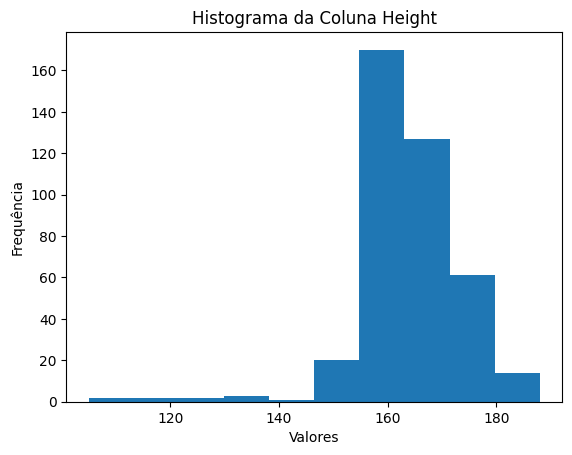

In [64]:
import matplotlib.pyplot as plt
# Escolha a coluna desejada para o histograma
coluna = 'Height'

# Crie o histograma
plt.hist(base[coluna], bins=10)

# Adicione rótulos e título ao histograma
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna {}'.format(coluna))

Com os dados atualizados, poderemos continuar a fazer a questão (b)

## **Verificando e limpando os dados de Weight**

In [69]:
# Calcular a mediana da coluna "Weight"
mediana = base["Weight"].median()

# Imprimir o valor da mediana
print("Mediana de Weight:", mediana)

Mediana de Weight: 164.0


In [71]:
# Substituir os valores fora do intervalo pela mediana
base["Weight"] = np.where((base["Weight"] < 40) | (base["Weight"] > 200), mediana_weight, base["Weight"])

# Imprimir o dataframe atualizado
print(base["Weight"])

0      164.0
1      164.0
2      164.0
3      164.0
4      164.0
       ...  
397    164.0
398    164.0
399    164.0
400    164.0
401    164.0
Name: Weight, Length: 402, dtype: float64


In [54]:
import matplotlib.pyplot as plt

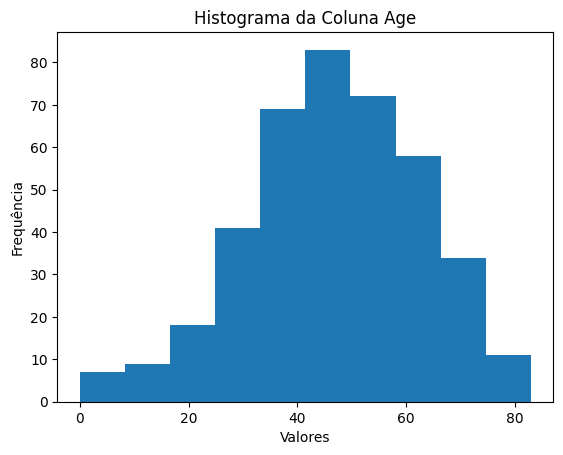

In [70]:
# Escolha a coluna desejada para o histograma
coluna = 'Age'

# Crie o histograma
plt.hist(base[coluna], bins=10)

# Adicione rótulos e título ao histograma
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna {}'.format(coluna))

# Exiba o histograma
plt.show()

<ipython-input-76-25e4db9667df>:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


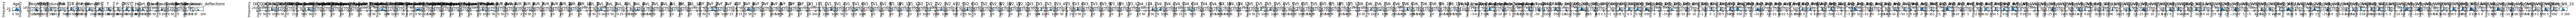

In [76]:
# Verificar se a coluna é numérica
def is_numeric_column(column):
    return pd.api.types.is_numeric_dtype(column)

# Definir o número de colunas no histograma
num_colunas = len(base.columns)

# Definir o número de linhas no histograma
num_linhas = len(base)

# Definir o tamanho da figura
plt.figure(figsize=(150, 100))

# Loop pelas colunas do DataFrame
for i, coluna in enumerate(base.columns):
    # Verificar se a coluna é numérica
    if is_numeric_column(base[coluna]):
        # Criar um novo subplot para cada coluna
        plt.subplot(num_linhas, num_colunas, i+1)

        # Gerar o histograma da coluna atual
        base[coluna].plot(kind="hist", bins=20)
        
        # Adicionar o nome da coluna como título
        plt.title(coluna)

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir o histograma
plt.show()

## **Frequência dos dados (questão 1.b)**

Calculando as frequencias das colunas

In [52]:
while True:
    # Exibir as colunas disponíveis para o usuário escolher
    '''print("\nColunas disponíveis:")
    for coluna in base.columns:
        print(coluna)'''

    # Solicitar ao usuário que escolha uma coluna ou digite "sair" para encerrar o loop
    coluna_escolhida = input("\nDigite o nome da coluna que deseja analisar (ou 'sair' para encerrar): ")

    if coluna_escolhida.lower() == "sair":
        # Encerrar o loop quando "sair" for digitado
        break

    # Verificar se a coluna escolhida existe no dataframe
    if coluna_escolhida not in base.columns:
        print("Coluna não encontrada.")
    else:
        # Obter os valores da coluna escolhida e remover os valores nulos
        valores = base[coluna_escolhida].dropna().tolist()

        # Calcular as estatísticas
        frequencia = pd.Series(valores).value_counts()
        minimo = min(valores)
        maximo = max(valores)
        desvio_padrao = sts.stdev(valores)

        # Exibir os resultados
        print("\nResultados:")
        print(f"\nColuna: {coluna_escolhida}\n")
        print(f"Frequência:\n{frequencia}")
        print(f"\nMínimo: {minimo}")
        print(f"\nMáximo: {maximo}")
        print(f"\nDesvio Padrão: {desvio_padrao:.2f}")




Digite o nome da coluna que deseja analisar (ou 'sair' para encerrar): Age

Resultados:

Coluna: Age

Frequência:
46.0    15
44.0    12
47.0    12
57.0    12
40.0    12
        ..
77.0     1
11.0     1
13.0     1
29.0     1
76.0     1
Length: 77, dtype: int64

Mínimo: 0.0

Máximo: 83.0

Desvio Padrão: 16.21

Digite o nome da coluna que deseja analisar (ou 'sair' para encerrar): sair
